In [9]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

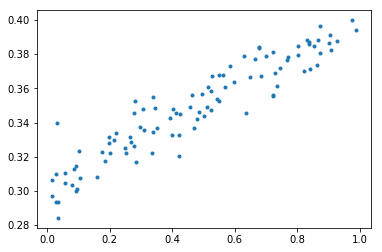

In [10]:
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

pylab.plot(x_data, y_data, '.')


In [11]:
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name="suzuki_weight")
b = tf.Variable(tf.zeros([1]), name="suzuki_bias")
y = W * x_data + b

print(W.name)
print(b.name)

suzuki_weight_1:0
suzuki_bias_1:0


In [16]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)


loss: Tensor("Mean_2:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x1161c3da0>
train: name: "GradientDescent_2"
op: "NoOp"
input: "^GradientDescent_2/update_suzuki_weight_1/ApplyGradientDescent"
input: "^GradientDescent_2/update_suzuki_bias_1/ApplyGradientDescent"



In [13]:
#print(tf.get_default_graph().as_graph_def())


In [14]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

print(sess.run([W, b]))


[array([ 0.52097929], dtype=float32), array([ 0.], dtype=float32)]


In [15]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run([W, b]))
        
print(sess.run([W, b]))



0 [array([ 0.53654915], dtype=float32), array([ 0.10361482], dtype=float32)]
20 [array([ 0.2130821], dtype=float32), array([ 0.24461836], dtype=float32)]
40 [array([ 0.12733534], dtype=float32), array([ 0.28763232], dtype=float32)]
60 [array([ 0.10399007], dtype=float32), array([ 0.29934323], dtype=float32)]
80 [array([ 0.09763411], dtype=float32), array([ 0.30253163], dtype=float32)]
100 [array([ 0.09590366], dtype=float32), array([ 0.30339968], dtype=float32)]
120 [array([ 0.09543253], dtype=float32), array([ 0.30363601], dtype=float32)]
140 [array([ 0.09530427], dtype=float32), array([ 0.30370036], dtype=float32)]
160 [array([ 0.09526933], dtype=float32), array([ 0.30371788], dtype=float32)]
180 [array([ 0.09525984], dtype=float32), array([ 0.30372265], dtype=float32)]
200 [array([ 0.09525723], dtype=float32), array([ 0.30372396], dtype=float32)]
[array([ 0.09525723], dtype=float32), array([ 0.30372396], dtype=float32)]


(0, 1.0)

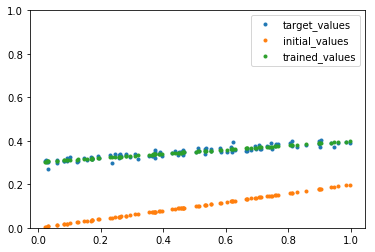

In [8]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, '.', label="initial_values")
pylab.plot(x_data, sess.run(y), '.', label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)